Este código implementa una GAN básica usando Keras para generar imágenes de dígitos similares a los de MNIST. El generador aprende a crear imágenes que se asemejan a las imágenes reales, mientras que el discriminador aprende a distinguir entre imágenes reales y falsas. Durante el entrenamiento, estos dos modelos se entrenan conjuntamente hasta que el generador produce imágenes realistas.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model


#### Cargar y preprocesar los datos MNIST

In [13]:
# Cargar el conjunto de datos MNIST
(X_train, _), (_, _) = mnist.load_data()

# Normalizar los datos
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

#### Construir el generador

In [14]:
def build_generator(latent_dim):
    model = Sequential()
    model.add(Input(shape=(latent_dim,)))
    model.add(Dense(256)),
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))

    return model

# Generador mejorado
def build_generator(latent_dim):
    model = Sequential([
        Input(shape=(latent_dim,)),
        Dense(256),
        LeakyReLU(0.2),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(0.2),
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(0.2),
        BatchNormalization(),
        Dense(28*28*1, activation='tanh'),
        Reshape((28,28,1))
    ])
    return model

#### Construir el discriminador

In [15]:
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Input(shape=img_shape))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(negative_slope=0.2))
    model.add(Dense(1, activation='sigmoid'))

    return model

# Discriminador equilibrado
def build_discriminator(img_shape):
    model = Sequential([
        Input(shape=img_shape),
        Flatten(),
        Dense(512),
        LeakyReLU(0.2),
        Dropout(0.3),
        Dense(256),
        LeakyReLU(0.2),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model



##Modelos

In [22]:
img_shape = (28, 28, 1)
latent_dim = 100

# Crear y compilar el discriminador ---
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.005, 0.5),
                      metrics=['accuracy'])

# Crear el generador ---
generator = build_generator(latent_dim)


# Asegurarse de congelar el discriminador ANTES de usarlo en la GAN
discriminator.trainable = False

z = Input(shape=(latent_dim,))
img = generator(z)

valid = discriminator(img)

combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Necesitamos restaurar el discriminador a entrenable para su propio entrenamiento
discriminator.trainable = True

##Entrenar la GAN

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0 [D loss: 4.319481372833252 | D accuracy: 80.19538116455078] [G loss: 11.212076187133789]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


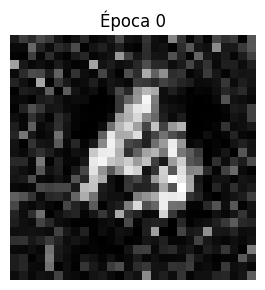

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1 [D loss: 4.318227767944336 | D accuracy: 80.19189453125] [G loss: 11.208998680114746]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2 [D loss: 4.316946029663086 | D accuracy: 80.19068145751953] [G loss: 11.205870628356934]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3 [D loss: 4.315647125244141 | D accuracy: 80.19091033935547] [G loss: 11.202789306640625]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4 [D loss: 4.31436824798584 | D accuracy: 80.189697265625] [G loss: 11.199676513671875]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5 [D loss: 4.313086032867432 | D accuracy: 80.18907928466797] [G loss: 11.196589469909668]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6 [D loss: 4.311824321746826 | D accuracy: 80.18682861328125] [G loss: 11.193458557128906]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7 [D loss: 4.310548782348633 | D accuracy: 80.18614959716797] [G loss: 11.190340042114258]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8 [D loss: 4.309269905090332 | D accuracy: 80.1865005493164] [G l

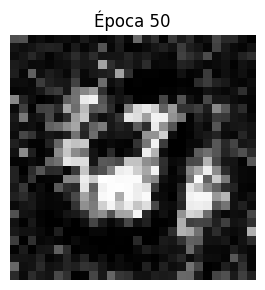

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
51 [D loss: 4.255646228790283 | D accuracy: 80.12257385253906] [G loss: 11.054830551147461]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
52 [D loss: 4.254413604736328 | D accuracy: 80.1212158203125] [G loss: 11.051758766174316]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
53 [D loss: 4.253184795379639 | D accuracy: 80.11953735351562] [G loss: 11.048686027526855]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
54 [D loss: 4.251954078674316 | D accuracy: 80.11824798583984] [G loss: 11.045669555664062]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
55 [D loss: 4.250737190246582 | D accuracy: 80.11624908447266] [G loss: 11.042656898498535]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
56 [D loss: 4.249528408050537 | D accuracy: 80.1141357421875] [G loss: 11.039630889892578]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
57 [D loss: 4.248310565948486 | D accuracy: 80.11124420166016] [G loss: 11.036603927612305]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
58 [D loss: 4.247087478637695 | D accuracy: 80.1090621

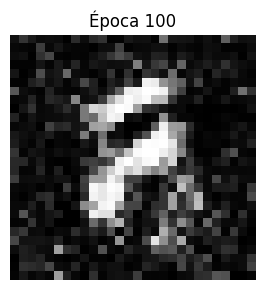

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
101 [D loss: 4.195483684539795 | D accuracy: 80.02778625488281] [G loss: 10.904787063598633]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
102 [D loss: 4.194300651550293 | D accuracy: 80.02641296386719] [G loss: 10.901843070983887]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
103 [D loss: 4.193119049072266 | D accuracy: 80.02497863769531] [G loss: 10.898933410644531]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
104 [D loss: 4.191949367523193 | D accuracy: 80.02223205566406] [G loss: 10.896010398864746]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
105 [D loss: 4.190779209136963 | D accuracy: 80.01973724365234] [G loss: 10.893036842346191]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
106 [D loss: 4.189581871032715 | D accuracy: 80.01899719238281] [G loss: 10.890135765075684]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
107 [D loss: 4.1884002685546875 | D accuracy: 80.01789093017578] [G loss: 10.8871431350708]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
108 [D loss: 4.187211990356445 | D accuracy: 8

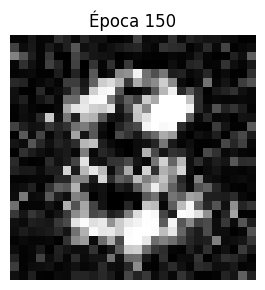

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
151 [D loss: 4.137432098388672 | D accuracy: 79.91983032226562] [G loss: 10.759553909301758]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
152 [D loss: 4.136296272277832 | D accuracy: 79.9177017211914] [G loss: 10.756693840026855]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
153 [D loss: 4.135176658630371 | D accuracy: 79.91441345214844] [G loss: 10.753824234008789]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
154 [D loss: 4.134029388427734 | D accuracy: 79.91273498535156] [G loss: 10.751006126403809]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
155 [D loss: 4.132894039154053 | D accuracy: 79.91055297851562] [G loss: 10.748101234436035]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
156 [D loss: 4.131746292114258 | D accuracy: 79.90869140625] [G loss: 10.745245933532715]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
157 [D loss: 4.130600929260254 | D accuracy: 79.90682220458984] [G loss: 10.74237060546875]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
158 [D loss: 4.129482746124268 | D accuracy: 79.90

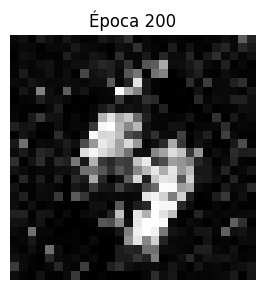

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
201 [D loss: 4.081253528594971 | D accuracy: 79.80944061279297] [G loss: 10.618158340454102]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
202 [D loss: 4.080158233642578 | D accuracy: 79.80586242675781] [G loss: 10.615375518798828]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
203 [D loss: 4.079055309295654 | D accuracy: 79.80393981933594] [G loss: 10.612594604492188]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
204 [D loss: 4.07795524597168 | D accuracy: 79.80171203613281] [G loss: 10.609786987304688]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
205 [D loss: 4.076848983764648 | D accuracy: 79.79936218261719] [G loss: 10.607048988342285]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
206 [D loss: 4.075767517089844 | D accuracy: 79.79597473144531] [G loss: 10.60429859161377]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
207 [D loss: 4.074667930603027 | D accuracy: 79.79380798339844] [G loss: 10.6015043258667]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
208 [D loss: 4.073559761047363 | D accuracy: 79.7

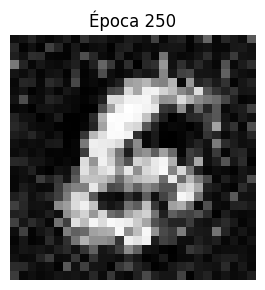

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
251 [D loss: 4.027135372161865 | D accuracy: 79.66792297363281] [G loss: 10.481157302856445]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
252 [D loss: 4.0260725021362305 | D accuracy: 79.66468048095703] [G loss: 10.478415489196777]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
253 [D loss: 4.025019645690918 | D accuracy: 79.66090393066406] [G loss: 10.47570514678955]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
254 [D loss: 4.02394962310791 | D accuracy: 79.65876007080078] [G loss: 10.473037719726562]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
255 [D loss: 4.022902011871338 | D accuracy: 79.6545639038086] [G loss: 10.470301628112793]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
256 [D loss: 4.021827697753906 | D accuracy: 79.65265655517578] [G loss: 10.467643737792969]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
257 [D loss: 4.0207600593566895 | D accuracy: 79.65015411376953] [G loss: 10.464942932128906]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
258 [D loss: 4.019683837890625 | D accuracy: 7

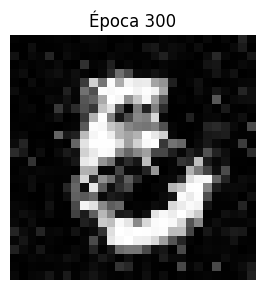

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
301 [D loss: 3.974888801574707 | D accuracy: 79.51435089111328] [G loss: 10.348395347595215]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
302 [D loss: 3.973848819732666 | D accuracy: 79.51187133789062] [G loss: 10.345783233642578]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
303 [D loss: 3.9728219509124756 | D accuracy: 79.50878143310547] [G loss: 10.343162536621094]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
304 [D loss: 3.971796989440918 | D accuracy: 79.50505828857422] [G loss: 10.340505599975586]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
305 [D loss: 3.9707605838775635 | D accuracy: 79.50334167480469] [G loss: 10.337865829467773]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
306 [D loss: 3.9697461128234863 | D accuracy: 79.49925994873047] [G loss: 10.335244178771973]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
307 [D loss: 3.9687259197235107 | D accuracy: 79.49583435058594] [G loss: 10.33260440826416]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
308 [D loss: 3.967710018157959 | D accurac

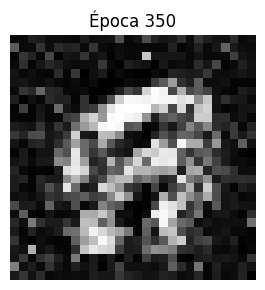

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
351 [D loss: 3.924156665802002 | D accuracy: 79.36054229736328] [G loss: 10.219301223754883]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
352 [D loss: 3.9231584072113037 | D accuracy: 79.35789489746094] [G loss: 10.216784477233887]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
353 [D loss: 3.922166347503662 | D accuracy: 79.35374450683594] [G loss: 10.214197158813477]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
354 [D loss: 3.921170949935913 | D accuracy: 79.35034942626953] [G loss: 10.211645126342773]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
355 [D loss: 3.9201912879943848 | D accuracy: 79.34521484375] [G loss: 10.209113121032715]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
356 [D loss: 3.9191932678222656 | D accuracy: 79.34188079833984] [G loss: 10.206602096557617]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
357 [D loss: 3.9182076454162598 | D accuracy: 79.33773803710938] [G loss: 10.204069137573242]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
358 [D loss: 3.917215347290039 | D accuracy:

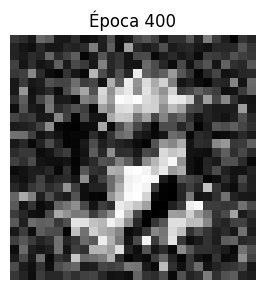

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
401 [D loss: 3.8752920627593994 | D accuracy: 79.18087005615234] [G loss: 10.094003677368164]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
402 [D loss: 3.874340534210205 | D accuracy: 79.17740631103516] [G loss: 10.091516494750977]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
403 [D loss: 3.873383045196533 | D accuracy: 79.17382049560547] [G loss: 10.08901596069336]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
404 [D loss: 3.8724100589752197 | D accuracy: 79.17052459716797] [G loss: 10.086555480957031]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
405 [D loss: 3.8714804649353027 | D accuracy: 79.1640853881836] [G loss: 10.084061622619629]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
406 [D loss: 3.870518684387207 | D accuracy: 79.1610336303711] [G loss: 10.081611633300781]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
407 [D loss: 3.869546890258789 | D accuracy: 79.15923309326172] [G loss: 10.079198837280273]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
408 [D loss: 3.8685925006866455 | D accuracy:

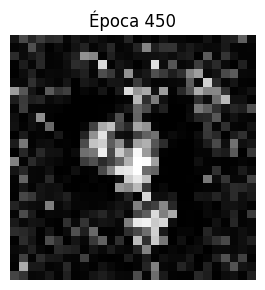

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
451 [D loss: 3.8279991149902344 | D accuracy: 78.9958267211914] [G loss: 9.972909927368164]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
452 [D loss: 3.8270606994628906 | D accuracy: 78.99296569824219] [G loss: 9.970499992370605]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
453 [D loss: 3.8261260986328125 | D accuracy: 78.98988342285156] [G loss: 9.968099594116211]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
454 [D loss: 3.825195074081421 | D accuracy: 78.98579406738281] [G loss: 9.965672492980957]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
455 [D loss: 3.8242478370666504 | D accuracy: 78.98356628417969] [G loss: 9.963262557983398]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
456 [D loss: 3.823331356048584 | D accuracy: 78.97863006591797] [G loss: 9.960850715637207]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
457 [D loss: 3.8223891258239746 | D accuracy: 78.97572326660156] [G loss: 9.958489418029785]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
458 [D loss: 3.8214821815490723 | D accuracy: 78

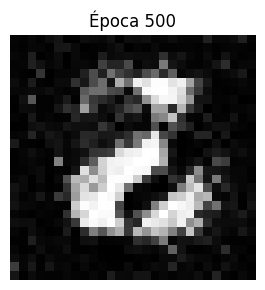

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
501 [D loss: 3.782315492630005 | D accuracy: 78.7955322265625] [G loss: 9.854642868041992]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
502 [D loss: 3.781416893005371 | D accuracy: 78.79032135009766] [G loss: 9.852298736572266]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
503 [D loss: 3.7805087566375732 | D accuracy: 78.78672790527344] [G loss: 9.849998474121094]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
504 [D loss: 3.77962064743042 | D accuracy: 78.7816390991211] [G loss: 9.847611427307129]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
505 [D loss: 3.7787070274353027 | D accuracy: 78.77889251708984] [G loss: 9.845250129699707]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
506 [D loss: 3.77780818939209 | D accuracy: 78.77525329589844] [G loss: 9.8429594039917]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
507 [D loss: 3.776926279067993 | D accuracy: 78.76966857910156] [G loss: 9.840654373168945]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
508 [D loss: 3.7760391235351562 | D accuracy: 78.7658081

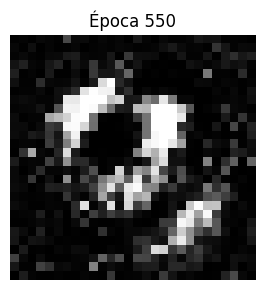

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
551 [D loss: 3.7381491661071777 | D accuracy: 78.57487487792969] [G loss: 9.74000358581543]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
552 [D loss: 3.737269878387451 | D accuracy: 78.57161712646484] [G loss: 9.737762451171875]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
553 [D loss: 3.736400842666626 | D accuracy: 78.5676498413086] [G loss: 9.735448837280273]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
554 [D loss: 3.735507011413574 | D accuracy: 78.5654296875] [G loss: 9.733193397521973]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
555 [D loss: 3.734645366668701 | D accuracy: 78.56124877929688] [G loss: 9.73094654083252]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
556 [D loss: 3.733799934387207 | D accuracy: 78.55491638183594] [G loss: 9.728699684143066]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
557 [D loss: 3.732924461364746 | D accuracy: 78.55149841308594] [G loss: 9.72641658782959]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
558 [D loss: 3.7320497035980225 | D accuracy: 78.5475387573

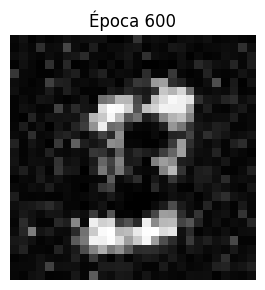

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
601 [D loss: 3.695096969604492 | D accuracy: 78.37330627441406] [G loss: 9.629022598266602]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
602 [D loss: 3.6942367553710938 | D accuracy: 78.3701400756836] [G loss: 9.626800537109375]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
603 [D loss: 3.693371295928955 | D accuracy: 78.36785888671875] [G loss: 9.624655723571777]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
604 [D loss: 3.6925251483917236 | D accuracy: 78.3638916015625] [G loss: 9.62247085571289]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
605 [D loss: 3.691685676574707 | D accuracy: 78.35971069335938] [G loss: 9.620269775390625]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
606 [D loss: 3.690849542617798 | D accuracy: 78.35476684570312] [G loss: 9.618091583251953]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
607 [D loss: 3.6900084018707275 | D accuracy: 78.35042572021484] [G loss: 9.615914344787598]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
608 [D loss: 3.6891744136810303 | D accuracy: 78.345

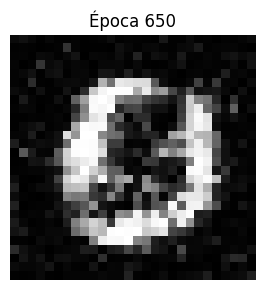

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
651 [D loss: 3.653305768966675 | D accuracy: 78.16976165771484] [G loss: 9.520967483520508]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
652 [D loss: 3.6524715423583984 | D accuracy: 78.16622161865234] [G loss: 9.518842697143555]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
653 [D loss: 3.6516623497009277 | D accuracy: 78.16130065917969] [G loss: 9.516688346862793]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
654 [D loss: 3.650836706161499 | D accuracy: 78.15744018554688] [G loss: 9.514598846435547]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
655 [D loss: 3.6500189304351807 | D accuracy: 78.15293884277344] [G loss: 9.512465476989746]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
656 [D loss: 3.649197578430176 | D accuracy: 78.14920043945312] [G loss: 9.510346412658691]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
657 [D loss: 3.6483795642852783 | D accuracy: 78.14485931396484] [G loss: 9.508267402648926]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
658 [D loss: 3.6475534439086914 | D accuracy: 78

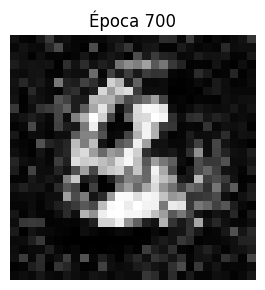

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
701 [D loss: 3.6128172874450684 | D accuracy: 77.96038055419922] [G loss: 9.416881561279297]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
702 [D loss: 3.61199688911438 | D accuracy: 77.95841979980469] [G loss: 9.414819717407227]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
703 [D loss: 3.611218214035034 | D accuracy: 77.95366668701172] [G loss: 9.412755012512207]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
704 [D loss: 3.6104211807250977 | D accuracy: 77.9499740600586] [G loss: 9.41068172454834]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
705 [D loss: 3.6096363067626953 | D accuracy: 77.9448013305664] [G loss: 9.408595085144043]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
706 [D loss: 3.608842611312866 | D accuracy: 77.94136810302734] [G loss: 9.406527519226074]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
707 [D loss: 3.608039140701294 | D accuracy: 77.93773651123047] [G loss: 9.404459953308105]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
708 [D loss: 3.6072394847869873 | D accuracy: 77.9343

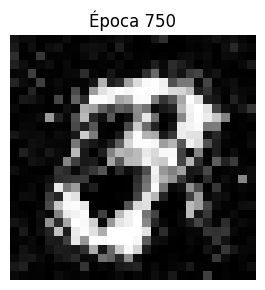

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
751 [D loss: 3.5733275413513184 | D accuracy: 77.77245330810547] [G loss: 9.315707206726074]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
752 [D loss: 3.5725741386413574 | D accuracy: 77.76640319824219] [G loss: 9.313721656799316]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
753 [D loss: 3.5718042850494385 | D accuracy: 77.76150512695312] [G loss: 9.311705589294434]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
754 [D loss: 3.571012496948242 | D accuracy: 77.75885009765625] [G loss: 9.309722900390625]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
755 [D loss: 3.5702292919158936 | D accuracy: 77.75572204589844] [G loss: 9.307744979858398]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
756 [D loss: 3.5694549083709717 | D accuracy: 77.75264739990234] [G loss: 9.305777549743652]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
757 [D loss: 3.5686933994293213 | D accuracy: 77.74744415283203] [G loss: 9.303773880004883]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
758 [D loss: 3.5679056644439697 | D accuracy: 

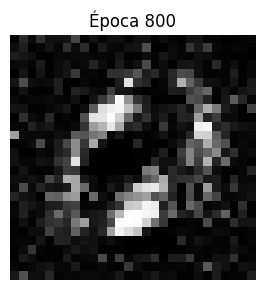

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
801 [D loss: 3.5350561141967773 | D accuracy: 77.57288360595703] [G loss: 9.217694282531738]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
802 [D loss: 3.5342838764190674 | D accuracy: 77.57035827636719] [G loss: 9.215827941894531]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
803 [D loss: 3.5335545539855957 | D accuracy: 77.5642318725586] [G loss: 9.213861465454102]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
804 [D loss: 3.532782793045044 | D accuracy: 77.56084442138672] [G loss: 9.211921691894531]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
805 [D loss: 3.532022476196289 | D accuracy: 77.55683898925781] [G loss: 9.210004806518555]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
806 [D loss: 3.531280517578125 | D accuracy: 77.55194854736328] [G loss: 9.208098411560059]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
807 [D loss: 3.5305309295654297 | D accuracy: 77.54804992675781] [G loss: 9.206154823303223]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
808 [D loss: 3.5297799110412598 | D accuracy: 77.

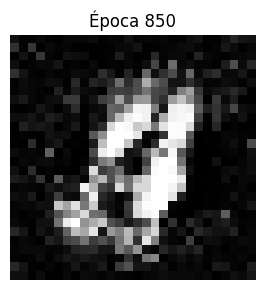

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
851 [D loss: 3.497622489929199 | D accuracy: 77.38542938232422] [G loss: 9.122612953186035]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
852 [D loss: 3.496889591217041 | D accuracy: 77.38166809082031] [G loss: 9.120745658874512]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
853 [D loss: 3.496152400970459 | D accuracy: 77.3779067993164] [G loss: 9.118924140930176]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
854 [D loss: 3.4954330921173096 | D accuracy: 77.37212371826172] [G loss: 9.116997718811035]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
855 [D loss: 3.4946837425231934 | D accuracy: 77.36953735351562] [G loss: 9.115107536315918]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
856 [D loss: 3.4939565658569336 | D accuracy: 77.36492156982422] [G loss: 9.113247871398926]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
857 [D loss: 3.4932408332824707 | D accuracy: 77.35979461669922] [G loss: 9.11135482788086]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
858 [D loss: 3.4925153255462646 | D accuracy: 77.3

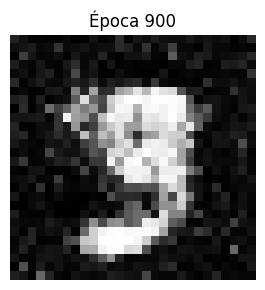

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
901 [D loss: 3.461409568786621 | D accuracy: 77.18671417236328] [G loss: 9.030360221862793]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
902 [D loss: 3.4606781005859375 | D accuracy: 77.18385314941406] [G loss: 9.028546333312988]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
903 [D loss: 3.459965229034424 | D accuracy: 77.17974090576172] [G loss: 9.02674674987793]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
904 [D loss: 3.4592537879943848 | D accuracy: 77.17558288574219] [G loss: 9.024933815002441]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
905 [D loss: 3.458547353744507 | D accuracy: 77.17127990722656] [G loss: 9.02313232421875]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
906 [D loss: 3.4578330516815186 | D accuracy: 77.167724609375] [G loss: 9.021300315856934]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
907 [D loss: 3.457124710083008 | D accuracy: 77.1637191772461] [G loss: 9.019453048706055]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
908 [D loss: 3.4564108848571777 | D accuracy: 77.15982

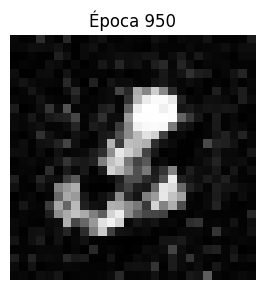

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
951 [D loss: 3.425969123840332 | D accuracy: 77.00711822509766] [G loss: 8.94080638885498]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
952 [D loss: 3.425266742706299 | D accuracy: 77.00384521484375] [G loss: 8.939032554626465]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
953 [D loss: 3.424563407897949 | D accuracy: 76.99968719482422] [G loss: 8.937225341796875]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
954 [D loss: 3.4238638877868652 | D accuracy: 76.9962158203125] [G loss: 8.935446739196777]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
955 [D loss: 3.4231865406036377 | D accuracy: 76.99131774902344] [G loss: 8.933670043945312]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
956 [D loss: 3.4224700927734375 | D accuracy: 76.98943328857422] [G loss: 8.93188190460205]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
957 [D loss: 3.421759605407715 | D accuracy: 76.98651123046875] [G loss: 8.930123329162598]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
958 [D loss: 3.4210567474365234 | D accuracy: 76.982

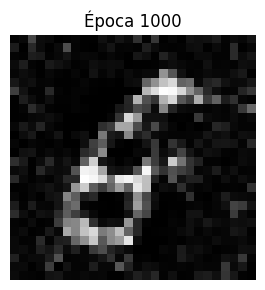

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1001 [D loss: 3.3914647102355957 | D accuracy: 76.8329849243164] [G loss: 8.854188919067383]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1002 [D loss: 3.3907742500305176 | D accuracy: 76.82979583740234] [G loss: 8.852535247802734]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1003 [D loss: 3.3901052474975586 | D accuracy: 76.82490539550781] [G loss: 8.850847244262695]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1004 [D loss: 3.389427661895752 | D accuracy: 76.82098388671875] [G loss: 8.84911060333252]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1005 [D loss: 3.3887388706207275 | D accuracy: 76.81804656982422] [G loss: 8.847393989562988]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1006 [D loss: 3.388056755065918 | D accuracy: 76.81436157226562] [G loss: 8.845687866210938]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1007 [D loss: 3.3873825073242188 | D accuracy: 76.81065368652344] [G loss: 8.844022750854492]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1008 [D loss: 3.3867363929748535 | D accur

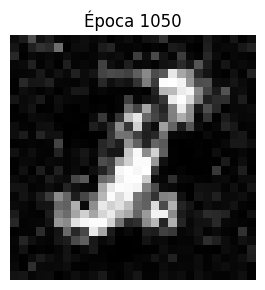

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1051 [D loss: 3.35764217376709 | D accuracy: 76.67115020751953] [G loss: 8.769965171813965]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1052 [D loss: 3.356961250305176 | D accuracy: 76.66886138916016] [G loss: 8.768275260925293]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1053 [D loss: 3.356262683868408 | D accuracy: 76.6681137084961] [G loss: 8.766664505004883]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1054 [D loss: 3.355600357055664 | D accuracy: 76.66384887695312] [G loss: 8.765010833740234]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1055 [D loss: 3.3549370765686035 | D accuracy: 76.66055297851562] [G loss: 8.763340950012207]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1056 [D loss: 3.3542747497558594 | D accuracy: 76.65686798095703] [G loss: 8.761656761169434]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1057 [D loss: 3.3535983562469482 | D accuracy: 76.65428924560547] [G loss: 8.760011672973633]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1058 [D loss: 3.3529253005981445 | D accurac

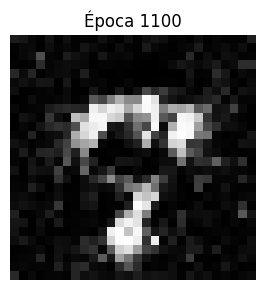

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1101 [D loss: 3.324347972869873 | D accuracy: 76.53807067871094] [G loss: 8.688621520996094]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1102 [D loss: 3.3237252235412598 | D accuracy: 76.5340347290039] [G loss: 8.686990737915039]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1103 [D loss: 3.3230764865875244 | D accuracy: 76.53085327148438] [G loss: 8.685349464416504]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1104 [D loss: 3.322420597076416 | D accuracy: 76.52876281738281] [G loss: 8.683709144592285]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1105 [D loss: 3.321751356124878 | D accuracy: 76.52700805664062] [G loss: 8.682065963745117]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1106 [D loss: 3.3211002349853516 | D accuracy: 76.52440643310547] [G loss: 8.680487632751465]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1107 [D loss: 3.320467233657837 | D accuracy: 76.51994323730469] [G loss: 8.678864479064941]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1108 [D loss: 3.3198211193084717 | D accura

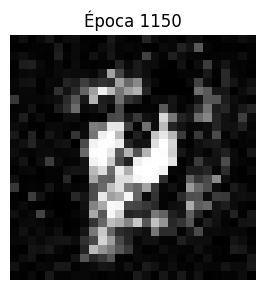

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1151 [D loss: 3.292102813720703 | D accuracy: 76.39653015136719] [G loss: 8.60952377319336]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1152 [D loss: 3.2914533615112305 | D accuracy: 76.39492797851562] [G loss: 8.607964515686035]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1153 [D loss: 3.2908072471618652 | D accuracy: 76.39285278320312] [G loss: 8.60643196105957]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1154 [D loss: 3.2901811599731445 | D accuracy: 76.389404296875] [G loss: 8.6048583984375]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1155 [D loss: 3.2895374298095703 | D accuracy: 76.38687133789062] [G loss: 8.60335922241211]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1156 [D loss: 3.2889132499694824 | D accuracy: 76.383056640625] [G loss: 8.601759910583496]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1157 [D loss: 3.2882494926452637 | D accuracy: 76.3818359375] [G loss: 8.600210189819336]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1158 [D loss: 3.2876243591308594 | D accuracy: 76.37

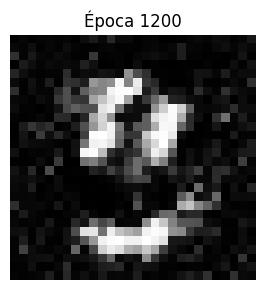

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1201 [D loss: 3.260456085205078 | D accuracy: 76.27141571044922] [G loss: 8.533108711242676]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1202 [D loss: 3.2598423957824707 | D accuracy: 76.26828002929688] [G loss: 8.531570434570312]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1203 [D loss: 3.259216070175171 | D accuracy: 76.2658920288086] [G loss: 8.529999732971191]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1204 [D loss: 3.258580446243286 | D accuracy: 76.26480102539062] [G loss: 8.528569221496582]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1205 [D loss: 3.2579803466796875 | D accuracy: 76.26068878173828] [G loss: 8.52706241607666]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1206 [D loss: 3.257373332977295 | D accuracy: 76.25774383544922] [G loss: 8.525530815124512]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1207 [D loss: 3.2567338943481445 | D accuracy: 76.25652313232422] [G loss: 8.524025917053223]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1208 [D loss: 3.256092071533203 | D accuracy

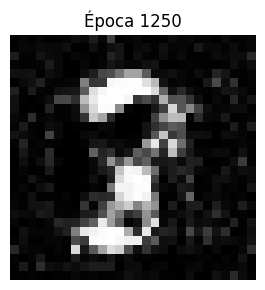

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1251 [D loss: 3.2294135093688965 | D accuracy: 76.16307830810547] [G loss: 8.458566665649414]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1252 [D loss: 3.2287774085998535 | D accuracy: 76.162109375] [G loss: 8.457148551940918]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1253 [D loss: 3.228163003921509 | D accuracy: 76.16036987304688] [G loss: 8.455680847167969]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1254 [D loss: 3.227541923522949 | D accuracy: 76.15853881835938] [G loss: 8.454236030578613]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1255 [D loss: 3.2269303798675537 | D accuracy: 76.15625] [G loss: 8.452707290649414]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1256 [D loss: 3.2263195514678955 | D accuracy: 76.15373229980469] [G loss: 8.451239585876465]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1257 [D loss: 3.2257080078125 | D accuracy: 76.1513442993164] [G loss: 8.449780464172363]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1258 [D loss: 3.225083351135254 | D accuracy: 76.150299072

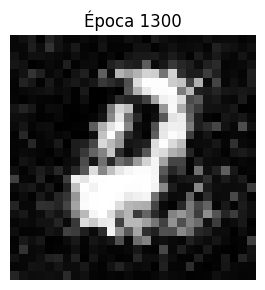

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1301 [D loss: 3.199148654937744 | D accuracy: 76.05239868164062] [G loss: 8.38623332977295]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1302 [D loss: 3.1985604763031006 | D accuracy: 76.04978942871094] [G loss: 8.384842872619629]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1303 [D loss: 3.1979618072509766 | D accuracy: 76.04750061035156] [G loss: 8.38342571258545]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1304 [D loss: 3.1973624229431152 | D accuracy: 76.04476928710938] [G loss: 8.381991386413574]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1305 [D loss: 3.1967620849609375 | D accuracy: 76.04275512695312] [G loss: 8.380558013916016]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1306 [D loss: 3.1961591243743896 | D accuracy: 76.04051971435547] [G loss: 8.379152297973633]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1307 [D loss: 3.1955623626708984 | D accuracy: 76.03845977783203] [G loss: 8.377729415893555]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1308 [D loss: 3.194962978363037 | D accur

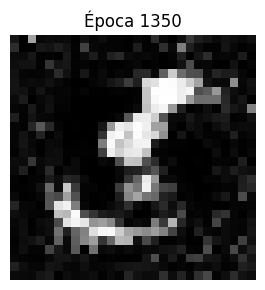

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1351 [D loss: 3.1694822311401367 | D accuracy: 75.9614486694336] [G loss: 8.315831184387207]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1352 [D loss: 3.168905735015869 | D accuracy: 75.95884704589844] [G loss: 8.314435005187988]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1353 [D loss: 3.168311595916748 | D accuracy: 75.9576416015625] [G loss: 8.313045501708984]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1354 [D loss: 3.167738676071167 | D accuracy: 75.95481872558594] [G loss: 8.3117036819458]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1355 [D loss: 3.1671738624572754 | D accuracy: 75.95137023925781] [G loss: 8.310328483581543]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1356 [D loss: 3.1665799617767334 | D accuracy: 75.94971466064453] [G loss: 8.308915138244629]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1357 [D loss: 3.166001319885254 | D accuracy: 75.94770812988281] [G loss: 8.307523727416992]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1358 [D loss: 3.1654276847839355 | D accuracy:

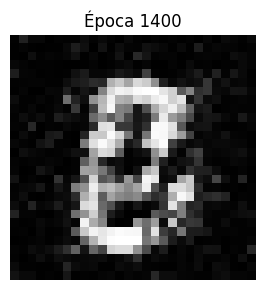

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1401 [D loss: 3.1406357288360596 | D accuracy: 75.86076354980469] [G loss: 8.24754524230957]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1402 [D loss: 3.140078067779541 | D accuracy: 75.85821533203125] [G loss: 8.246134757995605]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1403 [D loss: 3.13948917388916 | D accuracy: 75.85758209228516] [G loss: 8.244802474975586]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1404 [D loss: 3.138923168182373 | D accuracy: 75.85476684570312] [G loss: 8.243462562561035]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1405 [D loss: 3.1383447647094727 | D accuracy: 75.85337829589844] [G loss: 8.242069244384766]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1406 [D loss: 3.137751579284668 | D accuracy: 75.8530502319336] [G loss: 8.24074649810791]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1407 [D loss: 3.1371874809265137 | D accuracy: 75.85072326660156] [G loss: 8.239387512207031]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1408 [D loss: 3.136631965637207 | D accuracy: 

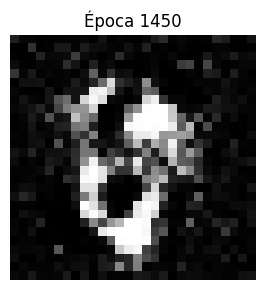

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1451 [D loss: 3.112173080444336 | D accuracy: 75.77848815917969] [G loss: 8.180719375610352]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1452 [D loss: 3.111621856689453 | D accuracy: 75.77686309814453] [G loss: 8.17940616607666]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1453 [D loss: 3.1110806465148926 | D accuracy: 75.77375030517578] [G loss: 8.178117752075195]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1454 [D loss: 3.11051607131958 | D accuracy: 75.7724380493164] [G loss: 8.176756858825684]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1455 [D loss: 3.109959602355957 | D accuracy: 75.77037811279297] [G loss: 8.17539119720459]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1456 [D loss: 3.1093850135803223 | D accuracy: 75.77008056640625] [G loss: 8.174083709716797]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1457 [D loss: 3.108825922012329 | D accuracy: 75.7684555053711] [G loss: 8.17273998260498]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1458 [D loss: 3.1082515716552734 | D accuracy: 75

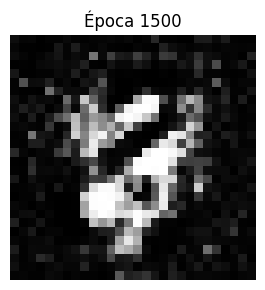

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1501 [D loss: 3.0844929218292236 | D accuracy: 75.69677734375] [G loss: 8.115798950195312]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1502 [D loss: 3.0839505195617676 | D accuracy: 75.69440460205078] [G loss: 8.11450481414795]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1503 [D loss: 3.0833840370178223 | D accuracy: 75.69364929199219] [G loss: 8.113184928894043]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1504 [D loss: 3.082819938659668 | D accuracy: 75.69297790527344] [G loss: 8.111879348754883]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1505 [D loss: 3.0822501182556152 | D accuracy: 75.6933822631836] [G loss: 8.11059856414795]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1506 [D loss: 3.0816783905029297 | D accuracy: 75.693359375] [G loss: 8.109298706054688]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1507 [D loss: 3.0811233520507812 | D accuracy: 75.6921615600586] [G loss: 8.108050346374512]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1508 [D loss: 3.0805976390838623 | D accuracy: 75.6

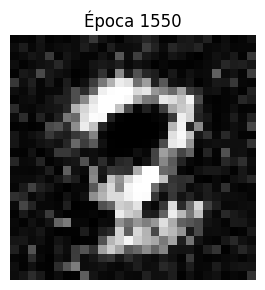

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1551 [D loss: 3.0572123527526855 | D accuracy: 75.62660217285156] [G loss: 8.052508354187012]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1552 [D loss: 3.0566797256469727 | D accuracy: 75.62458038330078] [G loss: 8.051246643066406]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1553 [D loss: 3.056118965148926 | D accuracy: 75.62457275390625] [G loss: 8.049991607666016]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1554 [D loss: 3.0555496215820312 | D accuracy: 75.6251220703125] [G loss: 8.048684120178223]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1555 [D loss: 3.0549871921539307 | D accuracy: 75.625244140625] [G loss: 8.047494888305664]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1556 [D loss: 3.0544512271881104 | D accuracy: 75.62373352050781] [G loss: 8.046231269836426]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1557 [D loss: 3.0538992881774902 | D accuracy: 75.62308502197266] [G loss: 8.044936180114746]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1558 [D loss: 3.053352117538452 | D accura

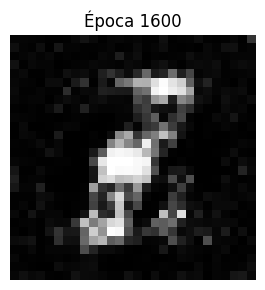

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1601 [D loss: 3.0305023193359375 | D accuracy: 75.56568145751953] [G loss: 7.991185665130615]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1602 [D loss: 3.029970645904541 | D accuracy: 75.56504821777344] [G loss: 7.990060806274414]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1603 [D loss: 3.029451847076416 | D accuracy: 75.56322479248047] [G loss: 7.988813400268555]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1604 [D loss: 3.0289292335510254 | D accuracy: 75.56107330322266] [G loss: 7.987602710723877]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1605 [D loss: 3.0284318923950195 | D accuracy: 75.55781555175781] [G loss: 7.986401081085205]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1606 [D loss: 3.0279078483581543 | D accuracy: 75.55693054199219] [G loss: 7.985137939453125]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1607 [D loss: 3.027372121810913 | D accuracy: 75.5561294555664] [G loss: 7.98394250869751]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1608 [D loss: 3.026857852935791 | D accurac

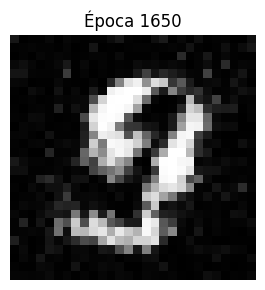

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1651 [D loss: 3.00423002243042 | D accuracy: 75.51437377929688] [G loss: 7.9312920570373535]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1652 [D loss: 3.0036866664886475 | D accuracy: 75.51498413085938] [G loss: 7.930111408233643]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1653 [D loss: 3.0031745433807373 | D accuracy: 75.51365661621094] [G loss: 7.9288859367370605]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1654 [D loss: 3.002636432647705 | D accuracy: 75.51375579833984] [G loss: 7.927724838256836]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1655 [D loss: 3.0021004676818848 | D accuracy: 75.51402282714844] [G loss: 7.9265456199646]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1656 [D loss: 3.001572370529175 | D accuracy: 75.51370239257812] [G loss: 7.925354480743408]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1657 [D loss: 3.001030683517456 | D accuracy: 75.51409912109375] [G loss: 7.924302577972412]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1658 [D loss: 3.000539779663086 | D accurac

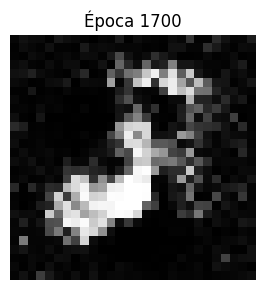

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1701 [D loss: 2.9783897399902344 | D accuracy: 75.47377014160156] [G loss: 7.873419284820557]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1702 [D loss: 2.9778707027435303 | D accuracy: 75.47317504882812] [G loss: 7.872313976287842]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1703 [D loss: 2.977374315261841 | D accuracy: 75.47123718261719] [G loss: 7.871134281158447]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1704 [D loss: 2.976862907409668 | D accuracy: 75.4698486328125] [G loss: 7.8700361251831055]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1705 [D loss: 2.976362705230713 | D accuracy: 75.46788787841797] [G loss: 7.868905067443848]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1706 [D loss: 2.975849151611328 | D accuracy: 75.467041015625] [G loss: 7.867757797241211]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1707 [D loss: 2.9753341674804688 | D accuracy: 75.4667739868164] [G loss: 7.86665153503418]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1708 [D loss: 2.9748196601867676 | D accuracy:

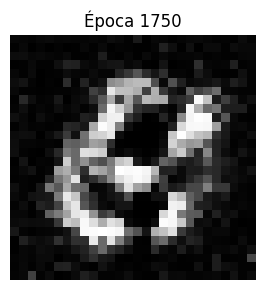

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1751 [D loss: 2.953188419342041 | D accuracy: 75.43183135986328] [G loss: 7.817108154296875]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1752 [D loss: 2.95267915725708 | D accuracy: 75.43120574951172] [G loss: 7.81597900390625]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1753 [D loss: 2.9521737098693848 | D accuracy: 75.43009185791016] [G loss: 7.814859867095947]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1754 [D loss: 2.9516518115997314 | D accuracy: 75.43036651611328] [G loss: 7.813735485076904]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1755 [D loss: 2.951137065887451 | D accuracy: 75.43052673339844] [G loss: 7.812614917755127]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1756 [D loss: 2.9506430625915527 | D accuracy: 75.42952728271484] [G loss: 7.8114399909973145]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1757 [D loss: 2.9501242637634277 | D accuracy: 75.4296875] [G loss: 7.810382843017578]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1758 [D loss: 2.9496331214904785 | D accuracy: 75

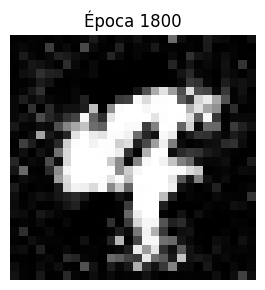

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1801 [D loss: 2.9281201362609863 | D accuracy: 75.41411590576172] [G loss: 7.761820316314697]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1802 [D loss: 2.927621364593506 | D accuracy: 75.41361999511719] [G loss: 7.760747909545898]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1803 [D loss: 2.9271297454833984 | D accuracy: 75.41215515136719] [G loss: 7.759622573852539]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1804 [D loss: 2.9266316890716553 | D accuracy: 75.41162109375] [G loss: 7.758485794067383]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1805 [D loss: 2.926132917404175 | D accuracy: 75.41165161132812] [G loss: 7.7574687004089355]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1806 [D loss: 2.9256744384765625 | D accuracy: 75.40908813476562] [G loss: 7.756320476531982]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1807 [D loss: 2.925180673599243 | D accuracy: 75.40851593017578] [G loss: 7.755197048187256]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1808 [D loss: 2.9246983528137207 | D accura

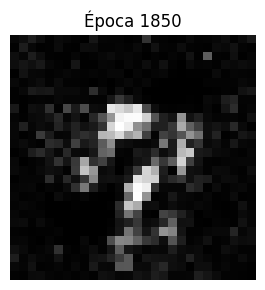

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1851 [D loss: 2.9041035175323486 | D accuracy: 75.36101531982422] [G loss: 7.707589149475098]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1852 [D loss: 2.904414176940918 | D accuracy: 75.3498306274414] [G loss: 7.706000804901123]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1853 [D loss: 2.911421298980713 | D accuracy: 75.34461212158203] [G loss: 7.705968379974365]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1854 [D loss: 2.922553539276123 | D accuracy: 75.33078002929688] [G loss: 7.706783294677734]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1855 [D loss: 2.9347944259643555 | D accuracy: 75.31591796875] [G loss: 7.705196380615234]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1856 [D loss: 2.942910671234131 | D accuracy: 75.3106918334961] [G loss: 7.7360734939575195]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1857 [D loss: 2.96165132522583 | D accuracy: 75.29519653320312] [G loss: 7.748722076416016]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1858 [D loss: 2.9718070030212402 | D accuracy: 7

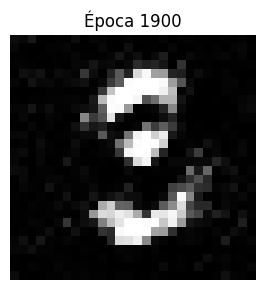

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1901 [D loss: 2.971005439758301 | D accuracy: 75.03662109375] [G loss: 7.711503982543945]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1902 [D loss: 2.9705350399017334 | D accuracy: 75.03477478027344] [G loss: 7.710354328155518]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1903 [D loss: 2.970050573348999 | D accuracy: 75.03353118896484] [G loss: 7.709190845489502]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1904 [D loss: 2.9695749282836914 | D accuracy: 75.03189849853516] [G loss: 7.708040237426758]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1905 [D loss: 2.969097137451172 | D accuracy: 75.0304183959961] [G loss: 7.706901550292969]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1906 [D loss: 2.9686312675476074 | D accuracy: 75.02838134765625] [G loss: 7.705739974975586]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1907 [D loss: 2.968170166015625 | D accuracy: 75.02578735351562] [G loss: 7.704609394073486]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1908 [D loss: 2.9677090644836426 | D accuracy:

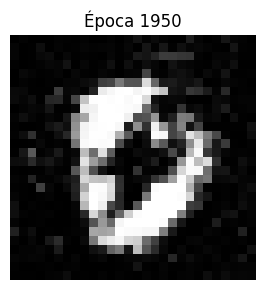

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1951 [D loss: 2.947256088256836 | D accuracy: 74.96422576904297] [G loss: 7.655162811279297]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1952 [D loss: 2.9467928409576416 | D accuracy: 74.96257781982422] [G loss: 7.654051303863525]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1953 [D loss: 2.946322441101074 | D accuracy: 74.9610824584961] [G loss: 7.65297794342041]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1954 [D loss: 2.9458584785461426 | D accuracy: 74.95915985107422] [G loss: 7.6518378257751465]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1955 [D loss: 2.9453797340393066 | D accuracy: 74.95799255371094] [G loss: 7.650703430175781]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1956 [D loss: 2.9448866844177246 | D accuracy: 74.9582748413086] [G loss: 7.649642467498779]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1957 [D loss: 2.9444165229797363 | D accuracy: 74.95697784423828] [G loss: 7.6485209465026855]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1958 [D loss: 2.943941116333008 | D accur

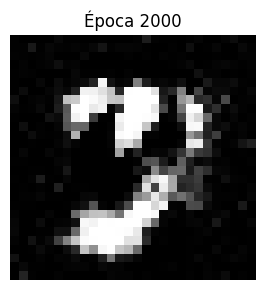

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2001 [D loss: 2.9235057830810547 | D accuracy: 74.92733001708984] [G loss: 7.599961757659912]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2002 [D loss: 2.9230220317840576 | D accuracy: 74.92769622802734] [G loss: 7.598904132843018]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2003 [D loss: 2.9225425720214844 | D accuracy: 74.92778778076172] [G loss: 7.597768783569336]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2004 [D loss: 2.9220633506774902 | D accuracy: 74.92765045166016] [G loss: 7.596682071685791]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2005 [D loss: 2.921593189239502 | D accuracy: 74.92723083496094] [G loss: 7.595632076263428]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2006 [D loss: 2.9211387634277344 | D accuracy: 74.9259262084961] [G loss: 7.59452486038208]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2007 [D loss: 2.9206628799438477 | D accuracy: 74.92605590820312] [G loss: 7.593423843383789]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2008 [D loss: 2.92020320892334 | D accura

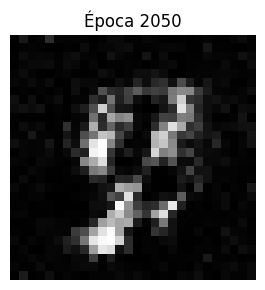

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2051 [D loss: 2.9001753330230713 | D accuracy: 74.89765930175781] [G loss: 7.5462965965271]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2052 [D loss: 2.8997108936309814 | D accuracy: 74.89694213867188] [G loss: 7.545243263244629]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2053 [D loss: 2.8992342948913574 | D accuracy: 74.89720153808594] [G loss: 7.544185161590576]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2054 [D loss: 2.898782730102539 | D accuracy: 74.89625549316406] [G loss: 7.543102264404297]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2055 [D loss: 2.898310661315918 | D accuracy: 74.89634704589844] [G loss: 7.542119026184082]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2056 [D loss: 2.897843837738037 | D accuracy: 74.89606475830078] [G loss: 7.541073322296143]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2057 [D loss: 2.8973727226257324 | D accuracy: 74.89635467529297] [G loss: 7.540071964263916]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2058 [D loss: 2.896925926208496 | D accurac

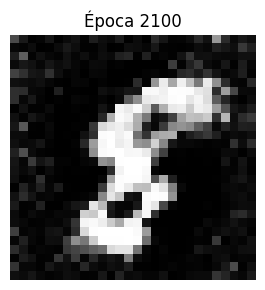

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2101 [D loss: 2.8769073486328125 | D accuracy: 74.89606475830078] [G loss: 7.494502544403076]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2102 [D loss: 2.876455545425415 | D accuracy: 74.89543151855469] [G loss: 7.4935126304626465]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2103 [D loss: 2.8759925365448 | D accuracy: 74.89568328857422] [G loss: 7.492462158203125]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2104 [D loss: 2.875553846359253 | D accuracy: 74.8946304321289] [G loss: 7.491450786590576]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2105 [D loss: 2.8751161098480225 | D accuracy: 74.89311981201172] [G loss: 7.490396499633789]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2106 [D loss: 2.8746566772460938 | D accuracy: 74.89295196533203] [G loss: 7.489329814910889]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2107 [D loss: 2.8742077350616455 | D accuracy: 74.89186096191406] [G loss: 7.488280296325684]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2108 [D loss: 2.873746871948242 | D accurac

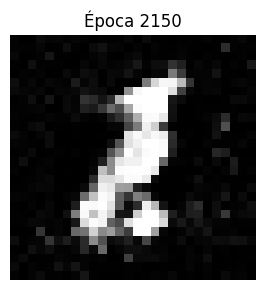

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2151 [D loss: 2.8541603088378906 | D accuracy: 74.88702392578125] [G loss: 7.4436869621276855]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2152 [D loss: 2.8537282943725586 | D accuracy: 74.88587188720703] [G loss: 7.442669868469238]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2153 [D loss: 2.8532826900482178 | D accuracy: 74.88570404052734] [G loss: 7.441648960113525]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2154 [D loss: 2.852843761444092 | D accuracy: 74.88481903076172] [G loss: 7.4406304359436035]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2155 [D loss: 2.852393627166748 | D accuracy: 74.88407897949219] [G loss: 7.439648628234863]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2156 [D loss: 2.851940631866455 | D accuracy: 74.88410186767578] [G loss: 7.438662052154541]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2157 [D loss: 2.851464033126831 | D accuracy: 74.88549041748047] [G loss: 7.437684059143066]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2158 [D loss: 2.8510076999664307 | D acc

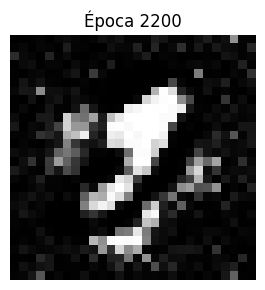

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2201 [D loss: 2.831735134124756 | D accuracy: 74.88829803466797] [G loss: 7.394551753997803]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2202 [D loss: 2.8312861919403076 | D accuracy: 74.88880920410156] [G loss: 7.393627166748047]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2203 [D loss: 2.830850601196289 | D accuracy: 74.88848876953125] [G loss: 7.392653942108154]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2204 [D loss: 2.830399513244629 | D accuracy: 74.88858795166016] [G loss: 7.391685485839844]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2205 [D loss: 2.8299458026885986 | D accuracy: 74.88916778564453] [G loss: 7.390733242034912]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2206 [D loss: 2.829503297805786 | D accuracy: 74.8888168334961] [G loss: 7.389741897583008]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2207 [D loss: 2.8290576934814453 | D accuracy: 74.88895416259766] [G loss: 7.388754367828369]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2208 [D loss: 2.828606128692627 | D accurac

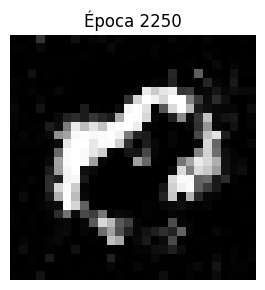

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2251 [D loss: 2.8095879554748535 | D accuracy: 74.89646911621094] [G loss: 7.346462726593018]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2252 [D loss: 2.8091373443603516 | D accuracy: 74.8974838256836] [G loss: 7.345502853393555]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2253 [D loss: 2.8086938858032227 | D accuracy: 74.89776611328125] [G loss: 7.344543933868408]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2254 [D loss: 2.808255434036255 | D accuracy: 74.89789581298828] [G loss: 7.343555450439453]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2255 [D loss: 2.8077950477600098 | D accuracy: 74.89933013916016] [G loss: 7.342617511749268]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2256 [D loss: 2.8073630332946777 | D accuracy: 74.89927673339844] [G loss: 7.341687202453613]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2257 [D loss: 2.806918144226074 | D accuracy: 74.89996337890625] [G loss: 7.340768814086914]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2258 [D loss: 2.806492805480957 | D accur

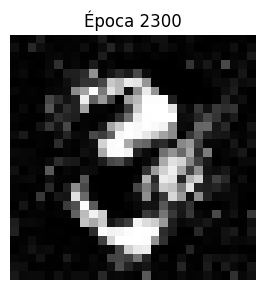

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2301 [D loss: 2.787809133529663 | D accuracy: 74.91018676757812] [G loss: 7.299559593200684]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2302 [D loss: 2.7873740196228027 | D accuracy: 74.91056823730469] [G loss: 7.298622131347656]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2303 [D loss: 2.7869250774383545 | D accuracy: 74.9117660522461] [G loss: 7.297747611999512]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2304 [D loss: 2.786482095718384 | D accuracy: 74.91295623779297] [G loss: 7.296813011169434]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2305 [D loss: 2.786039352416992 | D accuracy: 74.91433715820312] [G loss: 7.295957088470459]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2306 [D loss: 2.785649299621582 | D accuracy: 74.91284942626953] [G loss: 7.295090198516846]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2307 [D loss: 2.785266876220703 | D accuracy: 74.91069030761719] [G loss: 7.294102191925049]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2308 [D loss: 2.784824848175049 | D accuracy

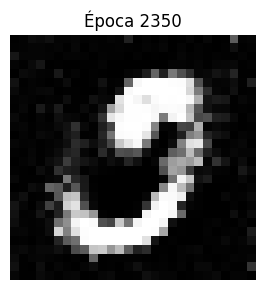

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2351 [D loss: 2.7662978172302246 | D accuracy: 74.93467712402344] [G loss: 7.2535786628723145]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2352 [D loss: 2.765871524810791 | D accuracy: 74.93582153320312] [G loss: 7.2526984214782715]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2353 [D loss: 2.7654647827148438 | D accuracy: 74.93531799316406] [G loss: 7.25180196762085]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2354 [D loss: 2.765030860900879 | D accuracy: 74.9360580444336] [G loss: 7.2508697509765625]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2355 [D loss: 2.7646090984344482 | D accuracy: 74.93614196777344] [G loss: 7.249946594238281]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2356 [D loss: 2.7641963958740234 | D accuracy: 74.93576049804688] [G loss: 7.249028205871582]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2357 [D loss: 2.763774871826172 | D accuracy: 74.936279296875] [G loss: 7.248102188110352]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2358 [D loss: 2.76334285736084 | D accurac

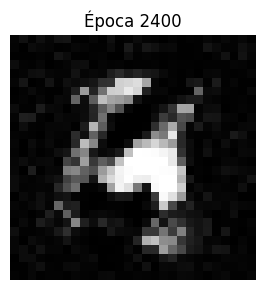

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2401 [D loss: 2.745293378829956 | D accuracy: 74.9540786743164] [G loss: 7.209121227264404]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2402 [D loss: 2.7448768615722656 | D accuracy: 74.95458984375] [G loss: 7.20820951461792]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2403 [D loss: 2.744462728500366 | D accuracy: 74.95442962646484] [G loss: 7.207327842712402]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2404 [D loss: 2.7440552711486816 | D accuracy: 74.95392608642578] [G loss: 7.206462383270264]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2405 [D loss: 2.74365234375 | D accuracy: 74.95320892333984] [G loss: 7.205558776855469]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2406 [D loss: 2.7432336807250977 | D accuracy: 74.9537582397461] [G loss: 7.204679012298584]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2407 [D loss: 2.742831230163574 | D accuracy: 74.95340728759766] [G loss: 7.20379114151001]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2408 [D loss: 2.742405414581299 | D accuracy: 74.9543

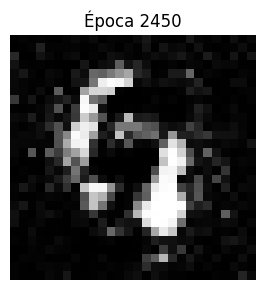

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2451 [D loss: 2.724766254425049 | D accuracy: 74.96403503417969] [G loss: 7.165030479431152]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2452 [D loss: 2.7243776321411133 | D accuracy: 74.96382141113281] [G loss: 7.164157867431641]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2453 [D loss: 2.7239909172058105 | D accuracy: 74.96304321289062] [G loss: 7.163303375244141]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2454 [D loss: 2.7235891819000244 | D accuracy: 74.96322631835938] [G loss: 7.162458419799805]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2455 [D loss: 2.7231862545013428 | D accuracy: 74.96308898925781] [G loss: 7.161565780639648]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2456 [D loss: 2.7227704524993896 | D accuracy: 74.96353149414062] [G loss: 7.160721778869629]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2457 [D loss: 2.722382068634033 | D accuracy: 74.96278381347656] [G loss: 7.15988302230835]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2458 [D loss: 2.721980333328247 | D accur

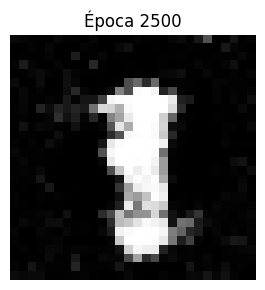

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2501 [D loss: 2.7047476768493652 | D accuracy: 74.96812438964844] [G loss: 7.121809482574463]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2502 [D loss: 2.704355239868164 | D accuracy: 74.96780395507812] [G loss: 7.1208977699279785]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2503 [D loss: 2.703958511352539 | D accuracy: 74.96778106689453] [G loss: 7.120033264160156]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2504 [D loss: 2.7035627365112305 | D accuracy: 74.96792602539062] [G loss: 7.119171619415283]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2505 [D loss: 2.7031667232513428 | D accuracy: 74.96778869628906] [G loss: 7.118292808532715]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2506 [D loss: 2.7027549743652344 | D accuracy: 74.96861267089844] [G loss: 7.117440700531006]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2507 [D loss: 2.702375888824463 | D accuracy: 74.96765899658203] [G loss: 7.116579055786133]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2508 [D loss: 2.701978921890259 | D accu

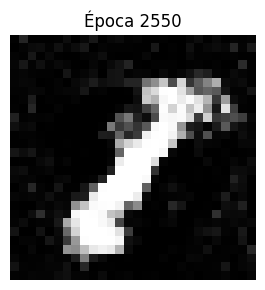

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2551 [D loss: 2.6852471828460693 | D accuracy: 74.96246337890625] [G loss: 7.079767227172852]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2552 [D loss: 2.6848604679107666 | D accuracy: 74.96204376220703] [G loss: 7.078929901123047]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2553 [D loss: 2.684474468231201 | D accuracy: 74.96198272705078] [G loss: 7.078046798706055]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2554 [D loss: 2.6840736865997314 | D accuracy: 74.9632568359375] [G loss: 7.0772705078125]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2555 [D loss: 2.6836910247802734 | D accuracy: 74.96298217773438] [G loss: 7.076438903808594]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2556 [D loss: 2.683300495147705 | D accuracy: 74.96267700195312] [G loss: 7.0756096839904785]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2557 [D loss: 2.6829144954681396 | D accuracy: 74.96240234375] [G loss: 7.074825286865234]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2558 [D loss: 2.6825263500213623 | D accuracy

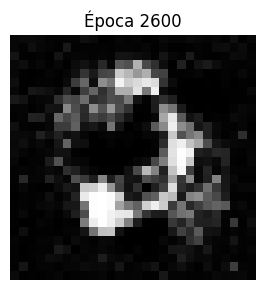

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2601 [D loss: 2.666144847869873 | D accuracy: 74.95858001708984] [G loss: 7.038610458374023]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2602 [D loss: 2.6657795906066895 | D accuracy: 74.9581298828125] [G loss: 7.037774085998535]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2603 [D loss: 2.6654036045074463 | D accuracy: 74.95841979980469] [G loss: 7.036942005157471]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2604 [D loss: 2.6650242805480957 | D accuracy: 74.958740234375] [G loss: 7.03608512878418]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2605 [D loss: 2.664642095565796 | D accuracy: 74.95881652832031] [G loss: 7.035266399383545]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2606 [D loss: 2.6642708778381348 | D accuracy: 74.95851135253906] [G loss: 7.034447193145752]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2607 [D loss: 2.663893699645996 | D accuracy: 74.95858764648438] [G loss: 7.033639907836914]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2608 [D loss: 2.663532257080078 | D accuracy:

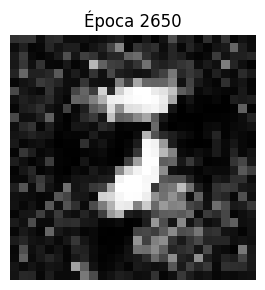

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2651 [D loss: 3.054326057434082 | D accuracy: 74.6240463256836] [G loss: 7.180676460266113]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2652 [D loss: 3.0540547370910645 | D accuracy: 74.61730194091797] [G loss: 7.179835319519043]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2653 [D loss: 3.053729295730591 | D accuracy: 74.61187744140625] [G loss: 7.179066181182861]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2654 [D loss: 3.0534253120422363 | D accuracy: 74.60559844970703] [G loss: 7.178189754486084]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2655 [D loss: 3.053084373474121 | D accuracy: 74.60044860839844] [G loss: 7.1773834228515625]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2656 [D loss: 3.0527639389038086 | D accuracy: 74.59505462646484] [G loss: 7.176548957824707]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2657 [D loss: 3.052426338195801 | D accuracy: 74.58992004394531] [G loss: 7.175682067871094]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2658 [D loss: 3.0520811080932617 | D accur

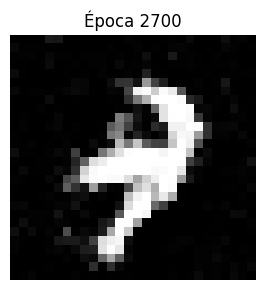

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2701 [D loss: 3.0357391834259033 | D accuracy: 74.4129409790039] [G loss: 7.1351118087768555]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2702 [D loss: 3.035353183746338 | D accuracy: 74.4090347290039] [G loss: 7.134142875671387]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2703 [D loss: 3.0349509716033936 | D accuracy: 74.40633392333984] [G loss: 7.133148670196533]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2704 [D loss: 3.0345516204833984 | D accuracy: 74.40311431884766] [G loss: 7.13217306137085]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2705 [D loss: 3.0341429710388184 | D accuracy: 74.4007568359375] [G loss: 7.131236553192139]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2706 [D loss: 3.033743381500244 | D accuracy: 74.39750671386719] [G loss: 7.130283355712891]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2707 [D loss: 3.033329725265503 | D accuracy: 74.394775390625] [G loss: 7.129333972930908]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2708 [D loss: 3.032935380935669 | D accuracy: 

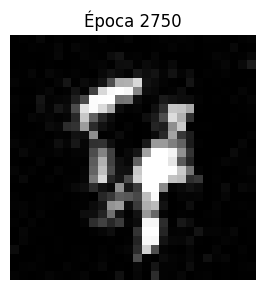

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2751 [D loss: 3.0157809257507324 | D accuracy: 74.26730346679688] [G loss: 7.086697578430176]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2752 [D loss: 3.015381336212158 | D accuracy: 74.2645492553711] [G loss: 7.085740089416504]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2753 [D loss: 3.0149760246276855 | D accuracy: 74.26244354248047] [G loss: 7.08479642868042]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2754 [D loss: 3.014573574066162 | D accuracy: 74.26001739501953] [G loss: 7.083850383758545]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2755 [D loss: 3.0141706466674805 | D accuracy: 74.25787353515625] [G loss: 7.082897186279297]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2756 [D loss: 3.0137734413146973 | D accuracy: 74.25559997558594] [G loss: 7.081941604614258]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2757 [D loss: 3.0133767127990723 | D accuracy: 74.25304412841797] [G loss: 7.080961227416992]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2758 [D loss: 3.0129787921905518 | D accur

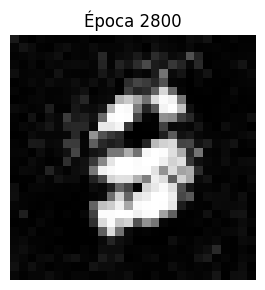

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2801 [D loss: 2.9959824085235596 | D accuracy: 74.12842559814453] [G loss: 7.039191246032715]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2802 [D loss: 2.9955849647521973 | D accuracy: 74.1255874633789] [G loss: 7.038265705108643]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2803 [D loss: 2.995190143585205 | D accuracy: 74.12274169921875] [G loss: 7.037301063537598]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2804 [D loss: 2.9947900772094727 | D accuracy: 74.12039947509766] [G loss: 7.036345958709717]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2805 [D loss: 2.994389772415161 | D accuracy: 74.1178970336914] [G loss: 7.035399913787842]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2806 [D loss: 2.99399995803833 | D accuracy: 74.11495208740234] [G loss: 7.034478664398193]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2807 [D loss: 2.9936203956604004 | D accuracy: 74.11140441894531] [G loss: 7.033524036407471]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2808 [D loss: 2.993220806121826 | D accuracy

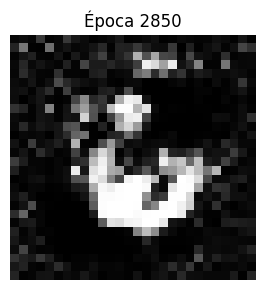

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2851 [D loss: 2.9763636589050293 | D accuracy: 74.00593566894531] [G loss: 6.992730140686035]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2852 [D loss: 2.9759864807128906 | D accuracy: 74.00287628173828] [G loss: 6.991811275482178]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2853 [D loss: 2.9755988121032715 | D accuracy: 74.00013732910156] [G loss: 6.990872859954834]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2854 [D loss: 2.9752049446105957 | D accuracy: 73.99757385253906] [G loss: 6.9899678230285645]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2855 [D loss: 2.974815845489502 | D accuracy: 73.99507904052734] [G loss: 6.98905086517334]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2856 [D loss: 2.9744198322296143 | D accuracy: 73.99285125732422] [G loss: 6.988142013549805]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2857 [D loss: 2.974022388458252 | D accuracy: 73.99111938476562] [G loss: 6.987249851226807]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2858 [D loss: 2.9736406803131104 | D acc

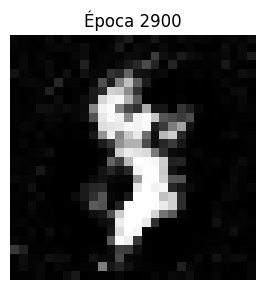

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2901 [D loss: 2.9570605754852295 | D accuracy: 73.88516235351562] [G loss: 6.9481401443481445]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2902 [D loss: 2.956700325012207 | D accuracy: 73.88174438476562] [G loss: 6.947262763977051]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2903 [D loss: 2.956336259841919 | D accuracy: 73.87767028808594] [G loss: 6.946343898773193]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2904 [D loss: 2.9559497833251953 | D accuracy: 73.87567901611328] [G loss: 6.945526123046875]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2905 [D loss: 2.9555764198303223 | D accuracy: 73.87284851074219] [G loss: 6.94463586807251]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2906 [D loss: 2.9551949501037598 | D accuracy: 73.8705062866211] [G loss: 6.943744659423828]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2907 [D loss: 2.9548163414001465 | D accuracy: 73.86735534667969] [G loss: 6.942882537841797]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2908 [D loss: 2.9544332027435303 | D accu

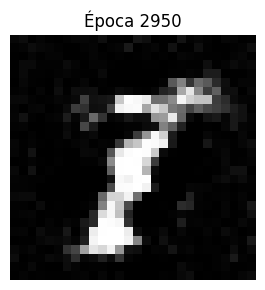

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2951 [D loss: 2.93804931640625 | D accuracy: 73.77393341064453] [G loss: 6.904458522796631]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2952 [D loss: 2.937675714492798 | D accuracy: 73.77108001708984] [G loss: 6.903614044189453]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2953 [D loss: 2.9373064041137695 | D accuracy: 73.76810455322266] [G loss: 6.902757167816162]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2954 [D loss: 2.9369311332702637 | D accuracy: 73.76549530029297] [G loss: 6.901865005493164]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2955 [D loss: 2.9365358352661133 | D accuracy: 73.76517486572266] [G loss: 6.901024341583252]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2956 [D loss: 2.9361515045166016 | D accuracy: 73.76407623291016] [G loss: 6.900188446044922]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2957 [D loss: 2.9357752799987793 | D accuracy: 73.76185607910156] [G loss: 6.899290561676025]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2958 [D loss: 2.935394287109375 | D accur

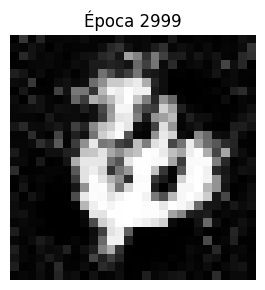

In [28]:
def train(epochs, batch_size=128, save_interval=50):
    # Cargar los datos
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    # Etiquetas para imágenes reales y falsas
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))


    for epoch in range(epochs):
        # Entrenar el discriminador

        # Seleccionar un conjunto aleatorio de imágenes reales
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generar un conjunto de imágenes falsas
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)

        # Entrenar el discriminador
        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Entrenar el generador

        # Generar un nuevo conjunto de ruido
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Entrenar el generador para engañar al discriminador
        g_loss = combined.train_on_batch(noise, valid)

        # Imprimir el progreso
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

        # Guardar imágenes generadas a intervalos
        #if epoch % save_interval == 0:
        #    save_imgs(epoch)
        # Visualizar cada 50 épocas
        if epoch % 50 == 0 or epoch == epochs - 1:
            plot_generated_image(epoch, generator, latent_dim)


def plot_generated_image(epoch, generator, latent_dim, n_images=1):
    noise = np.random.normal(0, 1, (n_images, latent_dim))
    generated_images = generator.predict(noise)

    # Escalar de [-1, 1] a [0, 1] para visualización
    generated_images = 0.5 * generated_images + 0.5

    plt.figure(figsize=(3, 3))
    for i in range(n_images):
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.title(f"Época {epoch}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Escalar las imágenes generadas de [-1, 1] a [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    fig.savefig(f"mnist_{epoch}.png")
    plt.close()

# Entrenar la GAN
train(epochs=3000, batch_size=128, save_interval=200)

In [24]:
generator.save("generador_MNIST.keras")

In [25]:
discriminator.save("discriminador_MNIST.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


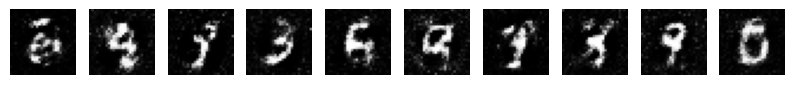

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def generate_and_plot_images(generator, latent_dim, n_images=10):
    # Generar ruido aleatorio
    noise = np.random.normal(0, 1, (n_images, latent_dim))

    # Generar imágenes
    generated_images = generator.predict(noise)

    # Escalar de [-1, 1] a [0, 1] para visualización
    generated_images = 0.5 * generated_images + 0.5

    # Mostrar las imágenes generadas
    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

# Llamar a la función después del entrenamiento
generate_and_plot_images(generator, latent_dim, n_images=10)

Época 0 [D loss: 0.8121 acc: 0.00%] [G loss: 0.7159]


<Figure size 2000x200 with 0 Axes>

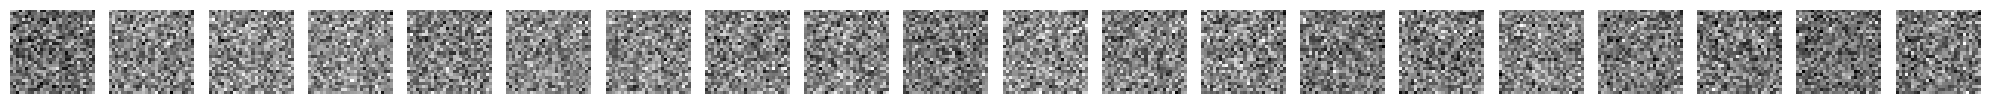

Época 200 [D loss: 0.4436 acc: 40.85%] [G loss: 4.6205]


<Figure size 2000x200 with 0 Axes>

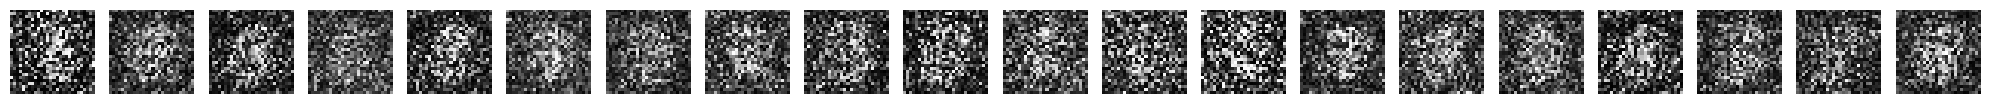

Época 400 [D loss: 0.5528 acc: 34.30%] [G loss: 2.9240]


<Figure size 2000x200 with 0 Axes>

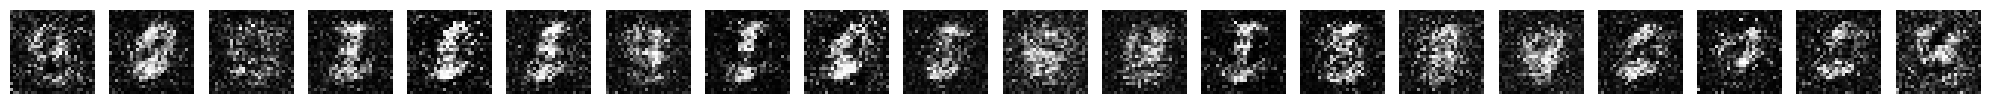

Época 600 [D loss: 0.5674 acc: 36.55%] [G loss: 2.3518]


<Figure size 2000x200 with 0 Axes>

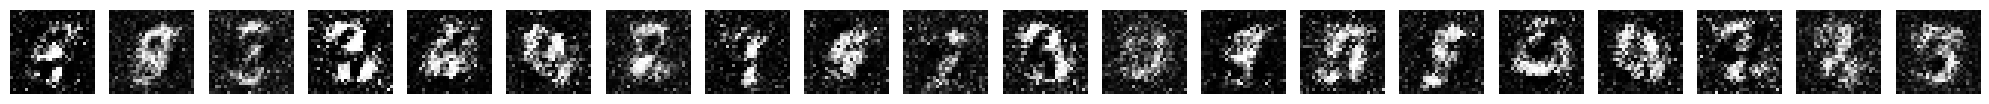

Época 800 [D loss: 0.5567 acc: 38.36%] [G loss: 2.1422]


<Figure size 2000x200 with 0 Axes>

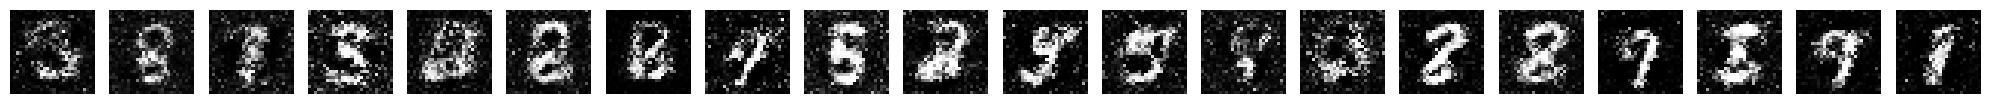

Época 1000 [D loss: 0.5550 acc: 39.21%] [G loss: 2.0220]


<Figure size 2000x200 with 0 Axes>

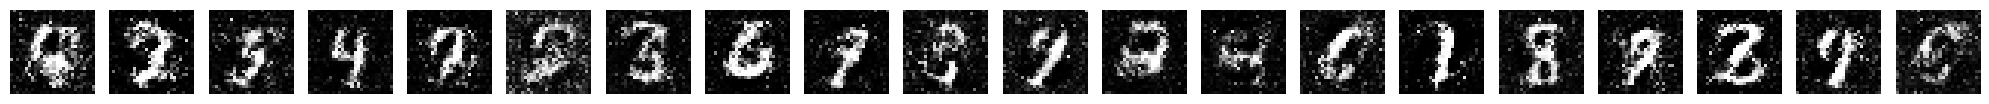

Época 1200 [D loss: 0.5579 acc: 39.61%] [G loss: 1.9370]


<Figure size 2000x200 with 0 Axes>

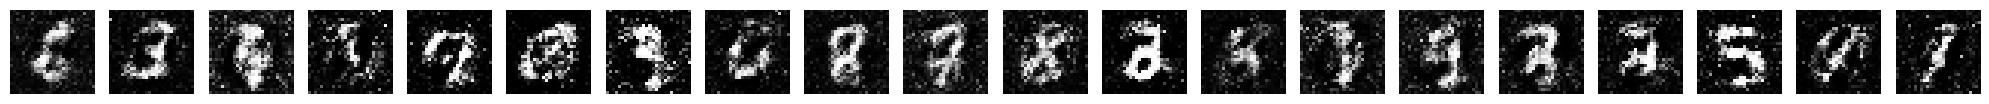

Época 1400 [D loss: 0.5612 acc: 39.83%] [G loss: 1.8669]


<Figure size 2000x200 with 0 Axes>

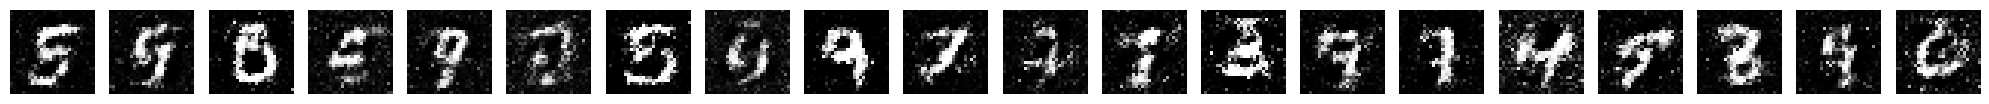

Época 1600 [D loss: 0.5645 acc: 39.98%] [G loss: 1.8115]


<Figure size 2000x200 with 0 Axes>

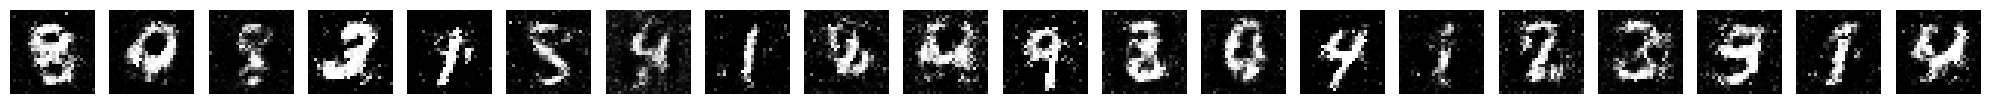

Época 1800 [D loss: 0.5677 acc: 40.10%] [G loss: 1.7643]


<Figure size 2000x200 with 0 Axes>

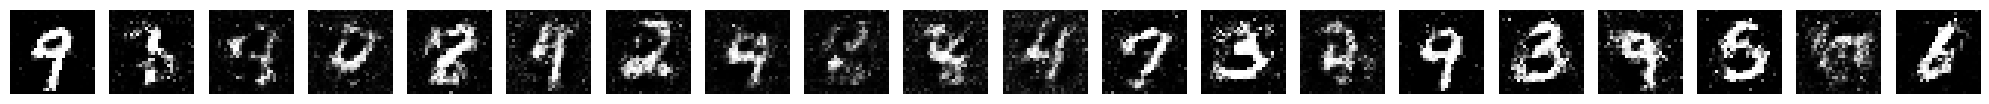

Época 2000 [D loss: 0.5714 acc: 40.12%] [G loss: 1.7233]


<Figure size 2000x200 with 0 Axes>

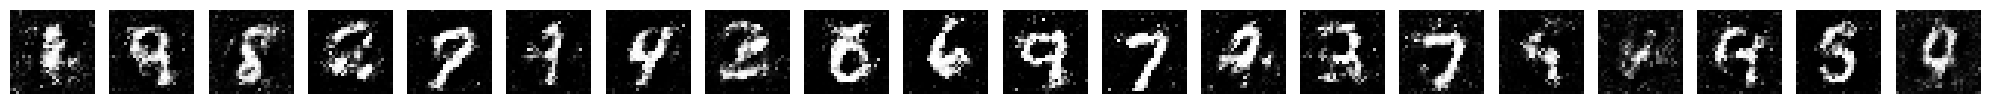

Época 2200 [D loss: 0.5745 acc: 40.12%] [G loss: 1.6875]


<Figure size 2000x200 with 0 Axes>

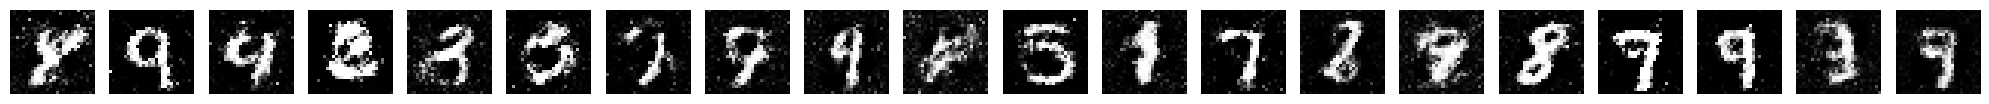

Época 2400 [D loss: 0.5779 acc: 40.10%] [G loss: 1.6546]


<Figure size 2000x200 with 0 Axes>

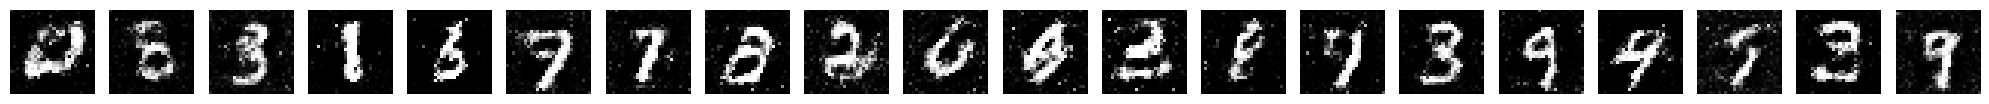


Reduciendo learning rates a: 0.0002500000118743628 (G) y 0.0005000000237487257 (D)
Época 2600 [D loss: 0.5793 acc: 40.17%] [G loss: 1.6223]


<Figure size 2000x200 with 0 Axes>

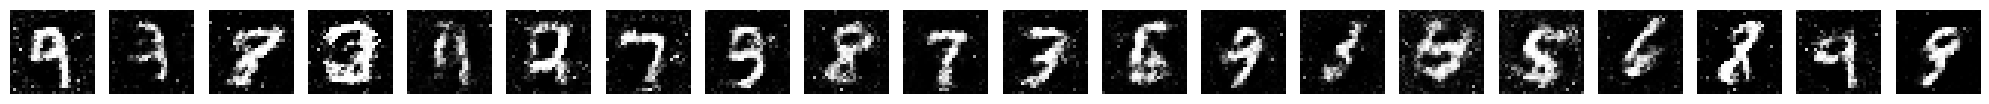

Época 2800 [D loss: 0.5789 acc: 40.30%] [G loss: 1.5917]


<Figure size 2000x200 with 0 Axes>

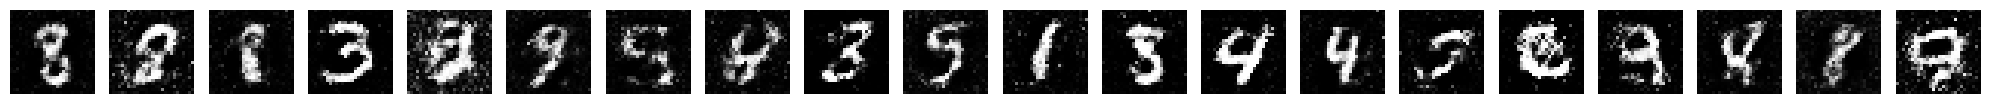

Época 3000 [D loss: 0.5790 acc: 40.40%] [G loss: 1.5651]


<Figure size 2000x200 with 0 Axes>

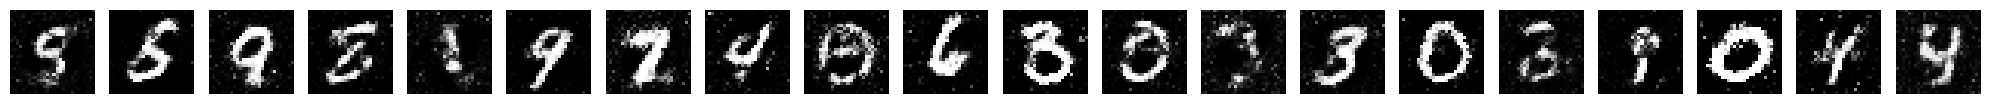

Época 3200 [D loss: 0.5796 acc: 40.44%] [G loss: 1.5425]


<Figure size 2000x200 with 0 Axes>

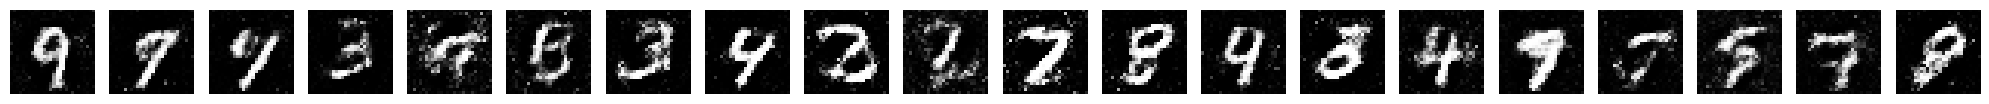

Época 3400 [D loss: 0.5805 acc: 40.46%] [G loss: 1.5224]


<Figure size 2000x200 with 0 Axes>

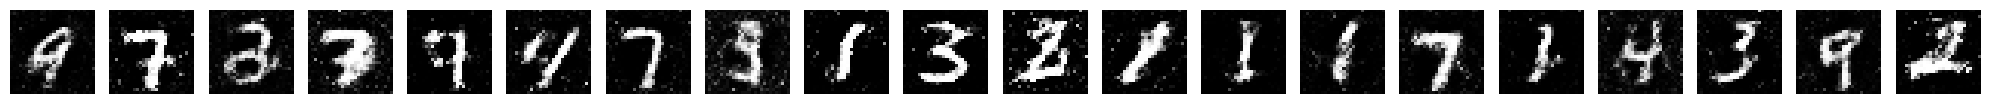

Época 3600 [D loss: 0.5811 acc: 40.49%] [G loss: 1.5044]


<Figure size 2000x200 with 0 Axes>

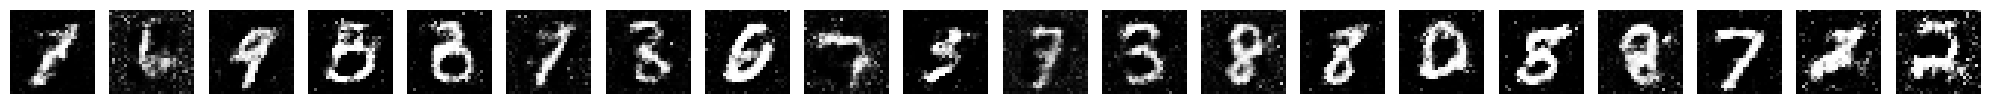

Época 3800 [D loss: 0.5821 acc: 40.48%] [G loss: 1.4878]


<Figure size 2000x200 with 0 Axes>

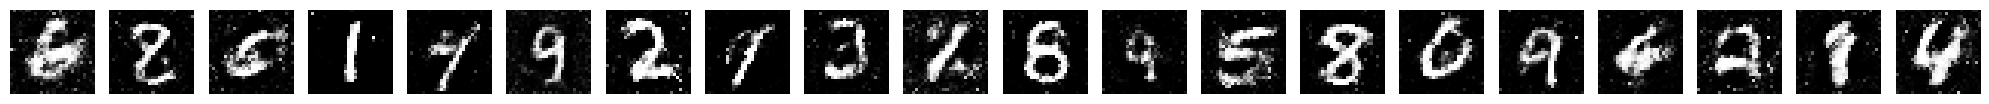

Época 4000 [D loss: 0.5831 acc: 40.47%] [G loss: 1.4728]


<Figure size 2000x200 with 0 Axes>

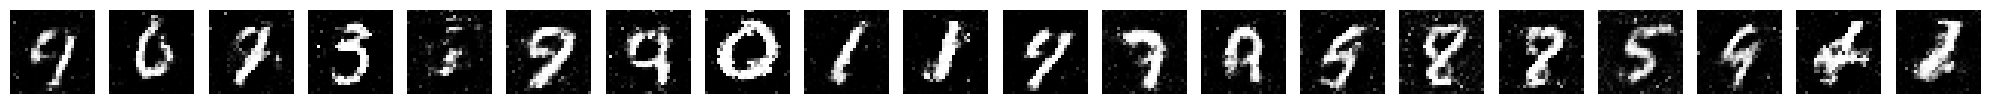

Época 4200 [D loss: 0.5842 acc: 40.46%] [G loss: 1.4590]


<Figure size 2000x200 with 0 Axes>

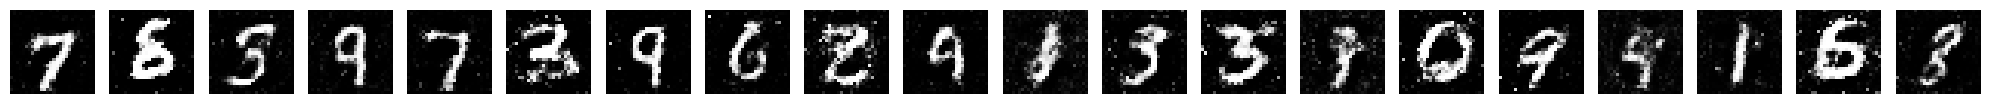

Época 4400 [D loss: 0.5853 acc: 40.43%] [G loss: 1.4460]


<Figure size 2000x200 with 0 Axes>

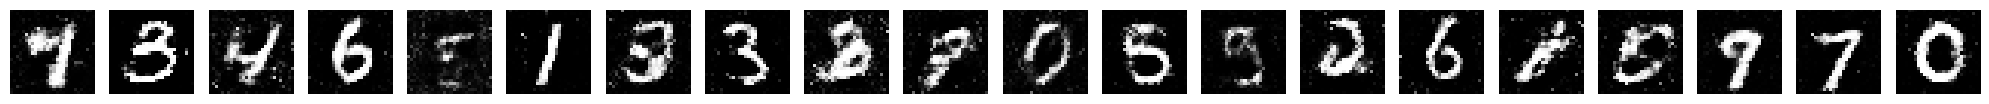

Época 4600 [D loss: 0.5865 acc: 40.40%] [G loss: 1.4338]


<Figure size 2000x200 with 0 Axes>

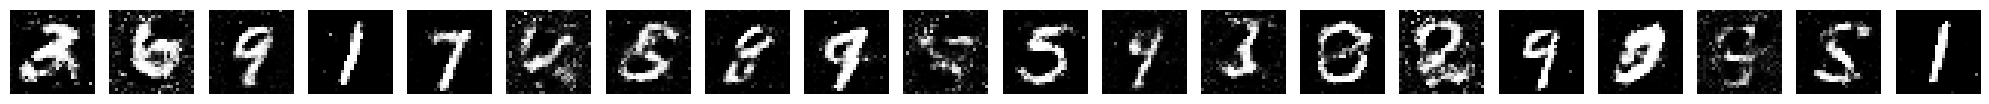

Época 4800 [D loss: 0.5876 acc: 40.38%] [G loss: 1.4226]


<Figure size 2000x200 with 0 Axes>

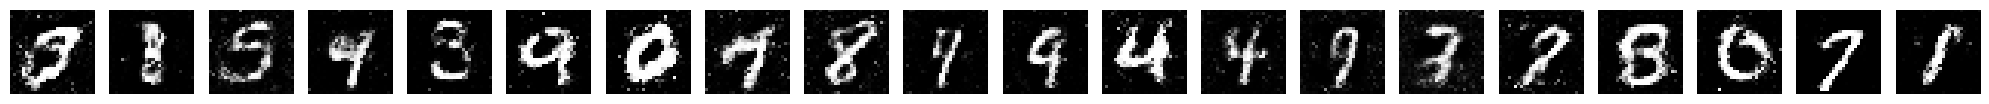

In [65]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Configuración inicial
latent_dim = 100
img_shape = (28, 28, 1)
batch_size = 64

# 2. Construcción del Generador
def build_generator():
    model = Sequential([
        Input(shape=(latent_dim,)),
        Dense(256),
        LeakyReLU(negative_slope=0.2),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(negative_slope=0.2),
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(negative_slope=0.2),
        BatchNormalization(),
        Dense(28*28*1, activation='tanh'),
        Reshape(img_shape)
    ])
    return model

# 3. Construcción del Discriminador
def build_discriminator():
    model = Sequential([
        Input(shape=img_shape),
        Flatten(),
        Dense(512),
        LeakyReLU(negative_slope=0.2),
        Dense(256),
        LeakyReLU(negative_slope=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# 4. Inicialización de modelos
generator = build_generator()
discriminator = build_discriminator()

# 5. Configuración de optimizadores
gen_optimizer = Adam(learning_rate=0.0005, beta_1=0.5)
disc_optimizer = Adam(learning_rate=0.001, beta_1=0.5)

# 6. Compilación CORREGIDA
# Primero compilamos el discriminador
discriminator.compile(optimizer=disc_optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Luego el modelo combinado CON CONGELACIÓN ADECUADA
z = Input(shape=(latent_dim,))
img = generator(z)

# Creamos una COPIA del discriminador para el modelo combinado
discriminator_copy = build_discriminator()
discriminator_copy.set_weights(discriminator.get_weights())
discriminator_copy.trainable = False  # Congelamos la copia

validity = discriminator_copy(img)
combined = Model(z, validity)
combined.compile(optimizer=gen_optimizer, loss='binary_crossentropy')

# 7. Función de entrenamiento mejorada
def train(epochs, batch_size, sample_interval=100):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    valid = np.ones((batch_size, 1)) * 0.9  # Label smoothing
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Ajuste Dinámico de Learning Rates
        if epoch == epochs//2:
            gen_optimizer.learning_rate.assign(gen_optimizer.learning_rate * 0.5)  # Reducir a la mitad
            disc_optimizer.learning_rate.assign(disc_optimizer.learning_rate * 0.5)
            print(f"\nReduciendo learning rates a: {gen_optimizer.learning_rate.numpy()} (G) y {disc_optimizer.learning_rate.numpy()} (D)")

        # --- Fase Discriminador ---
        # Seleccionamos un batch aleatorio
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_imgs = X_train[idx]

        # Generamos imágenes falsas
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise, verbose=0)

        # Entrenamos el discriminador
        d_loss_real = discriminator.train_on_batch(real_imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # --- Fase Generador ---
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = combined.train_on_batch(noise, valid)

        # Actualizamos la copia del discriminador
        discriminator_copy.set_weights(discriminator.get_weights())

        # Mostramos progreso
        if epoch % sample_interval == 0:
            print(f"Época {epoch} [D loss: {d_loss[0]:.4f} acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
            sample_images(epoch)


def sample_images(epoch):
    plt.figure(figsize=(20, 2))  # Aumentamos el tamaño del figure
    r, c = 1, 20  # 1 fila, 20 columnas

    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise, verbose=0)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Escalamos a [0,1]

    # Configuración de subplots con ajustes de espaciado
    fig, axs = plt.subplots(r, c, figsize=(20, 2))

    # Eliminamos los ejes y mostramos las imágenes
    for i in range(r * c):
        axs[i].imshow(gen_imgs[i, :, :, 0], cmap='gray', interpolation='nearest')
        axs[i].axis('off')

    #plt.subplots_adjust(wspace=0.05, hspace=0)
    plt.tight_layout()
    plt.show()


# 8. Iniciar entrenamiento
train(epochs=5000, batch_size=batch_size, sample_interval=200)